In [5]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
from tensorflow.random import set_seed

set_seed(455)
np.random.seed(455)

dataset = pd.read_csv("TSLA.csv", index_col="Date", parse_dates=["Date"])
print(dataset.head())

             Open   High    Low  Close  Adj Close    Volume
Date                                                       
2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500


In [6]:
print(dataset.describe())

              Open         High          Low        Close    Adj Close  \
count  2973.000000  2973.000000  2973.000000  2973.000000  2973.000000   
mean    143.883855   147.073134   140.523783   143.964734   143.964734   
std     258.588832   264.562286   252.223405   258.697736   258.697736   
min       3.228000     3.326000     2.996000     3.160000     3.160000   
25%      20.309999    20.740000    19.714001    20.129999    20.129999   
50%      46.875999    47.570000    45.910000    46.796001    46.796001   
75%      68.407997    69.500000    67.185997    68.503998    68.503998   
max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   

             Volume  
count  2.973000e+03  
mean   3.126188e+07  
std    2.791490e+07  
min    5.925000e+05  
25%    1.316750e+07  
50%    2.482100e+07  
75%    3.968620e+07  
max    3.046940e+08  


In [7]:
dataset.isna().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

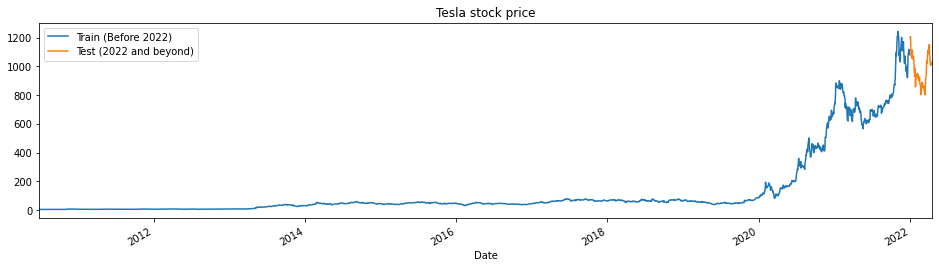

In [10]:
tstart = 2010
tend = 2021

def train_test_plot(dataset, tstart, tend):
    dataset.loc[f"{tstart}":f"{tend}", "High"].plot(figsize=(16, 4), legend=True)
    dataset.loc[f"{tend+1}":, "High"].plot(figsize=(16, 4), legend=True)
    plt.legend([f"Train (Before {tend+1})", f"Test ({tend+1} and beyond)"])
    plt.title("Tesla stock price")
    plt.show()

train_test_plot(dataset,tstart,tend)

In [11]:
def train_test_split(dataset, tstart, tend):
    train = dataset.loc[f"{tstart}":f"{tend}", "High"].values
    test = dataset.loc[f"{tend+1}":, "High"].values
    return train, test
training_set, test_set = train_test_split(dataset, tstart, tend)

In [12]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set = training_set.reshape(-1, 1)
training_set_scaled = sc.fit_transform(training_set)

In [13]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)


n_steps = 60
features = 1
# split into samples
X_train, y_train = split_sequence(training_set_scaled, n_steps)

In [14]:
# Reshaping X_train for model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],features)

In [15]:
# The LSTM architecture
model_lstm = Sequential()
model_lstm.add(LSTM(units=125, activation="tanh", input_shape=(n_steps, features)))
model_lstm.add(Dense(units=1))
# Compiling the model
model_lstm.compile(optimizer="RMSprop", loss="mse")

model_lstm.summary()

2022-04-20 18:49:50.048670: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-04-20 18:49:50.053032: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 125)               63500     
_________________________________________________________________
dense (Dense)                (None, 1)                 126       
Total params: 63,626
Trainable params: 63,626
Non-trainable params: 0
_________________________________________________________________


In [16]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=32)


2022-04-20 18:50:25.763940: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/50
89/89 [==============================] - 5s 36ms/step - loss: 0.0035
Epoch 2/50
89/89 [==============================] - 3s 35ms/step - loss: 4.6318e-04
Epoch 3/50
89/89 [==============================] - 3s 36ms/step - loss: 2.8806e-04
Epoch 4/50
89/89 [==============================] - 3s 37ms/step - loss: 2.7703e-04
Epoch 5/50
89/89 [==============================] - 3s 35ms/step - loss: 2.5018e-04
Epoch 6/50
89/89 [==============================] - 3s 36ms/step - loss: 2.2604e-04
Epoch 7/50
89/89 [==============================] - 4s 42ms/step - loss: 2.5889e-04
Epoch 8/50
89/89 [==============================] - 3s 37ms/step - loss: 1.7442e-04
Epoch 9/50
89/89 [==============================] - 3s 37ms/step - loss: 1.8544e-04
Epoch 10/50
89/89 [==============================] - 3s 39ms/step - loss: 2.3934e-04
Epoch 11/50
89/89 [==============================] - 4s 41ms/step - loss: 1.4545e-04
Epoch 12/50
89/89 [==============================] - 3s 39ms/step - loss: 1.56

In [17]:
dataset_total = dataset.loc[:,"High"]
inputs = dataset_total[len(dataset_total) - len(test_set) - n_steps :].values
inputs = inputs.reshape(-1, 1)
#scaling
inputs = sc.transform(inputs)

# Split into samples
X_test, y_test = split_sequence(inputs, n_steps)
# reshape
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], features)
#prediction
predicted_stock_price = model_lstm.predict(X_test)
#inverse transform the values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [18]:
def plot_predictions(test, predicted):
    plt.plot(test, color="gray", label="Real")
    plt.plot(predicted, color="red", label="Predicted")
    plt.title("MasterCard Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("MasterCard Stock Price")
    plt.legend()
    plt.show()


def return_rmse(test, predicted):
    rmse = np.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {:.2f}.".format(rmse))

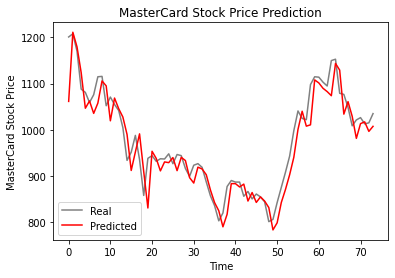

In [19]:
plot_predictions(test_set,predicted_stock_price)

In [20]:
return_rmse(test_set,predicted_stock_price)


The root mean squared error is 37.17.


In [21]:
model_gru = Sequential()
model_gru.add(GRU(units=125, activation="tanh", input_shape=(n_steps, features)))
model_gru.add(Dense(units=1))
# Compiling the RNN
model_gru.compile(optimizer="RMSprop", loss="mse")

model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 125)               48000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 126       
Total params: 48,126
Trainable params: 48,126
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_gru.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
89/89 [==============================] - 4s 32ms/step - loss: 0.0051
Epoch 2/50
89/89 [==============================] - 3s 28ms/step - loss: 3.6163e-04
Epoch 3/50
89/89 [==============================] - 2s 28ms/step - loss: 2.1028e-04
Epoch 4/50
89/89 [==============================] - 3s 28ms/step - loss: 1.8510e-04
Epoch 5/50
89/89 [==============================] - 3s 30ms/step - loss: 1.6161e-04
Epoch 6/50
89/89 [==============================] - 3s 31ms/step - loss: 1.5252e-04
Epoch 7/50
89/89 [==============================] - 3s 33ms/step - loss: 1.6327e-04
Epoch 8/50
89/89 [==============================] - 3s 33ms/step - loss: 1.5463e-04
Epoch 9/50
89/89 [==============================] - 3s 33ms/step - loss: 1.3751e-04
Epoch 10/50
89/89 [==============================] - 3s 33ms/step - loss: 1.7935e-04
Epoch 11/50
89/89 [==============================] - 3s 32ms/step - loss: 1.2784e-04
Epoch 12/50
89/89 [==============================] - 3s 30ms/step - loss: 1.17

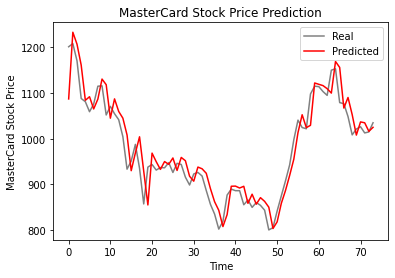

In [24]:
GRU_predicted_stock_price = model_gru.predict(X_test)
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted_stock_price)
plot_predictions(test_set, GRU_predicted_stock_price)

In [25]:
return_rmse(test_set,GRU_predicted_stock_price)


The root mean squared error is 35.84.
